In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("titanic.csv")

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
# shape

df.shape

(891, 12)

In [51]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
# info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
# describe

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
# missing null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
# we have 3 columns where null values are there
# Age,Cabin,Embarked
# first we are dropping the Cabin feature because it has most null values

df.drop(columns="Cabin",inplace = True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [57]:
# filling null values in age feature with mean value of age
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [58]:
# filling null values in Embarked 
# first finding most appeared values
df["Embarked"].value_counts()

# S appeared most times 
df["Embarked"].fillna("S",inplace = True)

In [59]:
import warnings
warnings.filterwarnings("ignore")

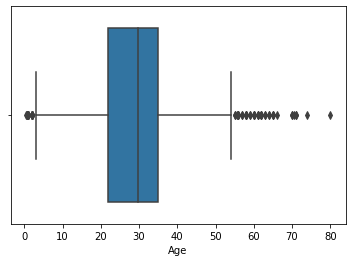

In [60]:
# outliers

plt.figure()
sns.boxplot(df["Age"])
plt.show()

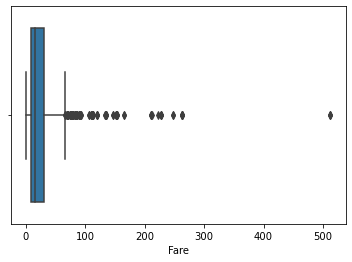

In [61]:

plt.figure()
sns.boxplot(df["Fare"])
plt.show()

In [62]:
q1 = np.quantile(df["Fare"],0.25)
q3 = np.quantile(df["Fare"],0.75)

print(q1)
print(q3)


7.9104
31.0


In [63]:
iqr = q3 - q1
uw = q3+(1.5*iqr)
lw = q1-(1.5*iqr)

print(uw)
print(lw)

65.6344
-26.724


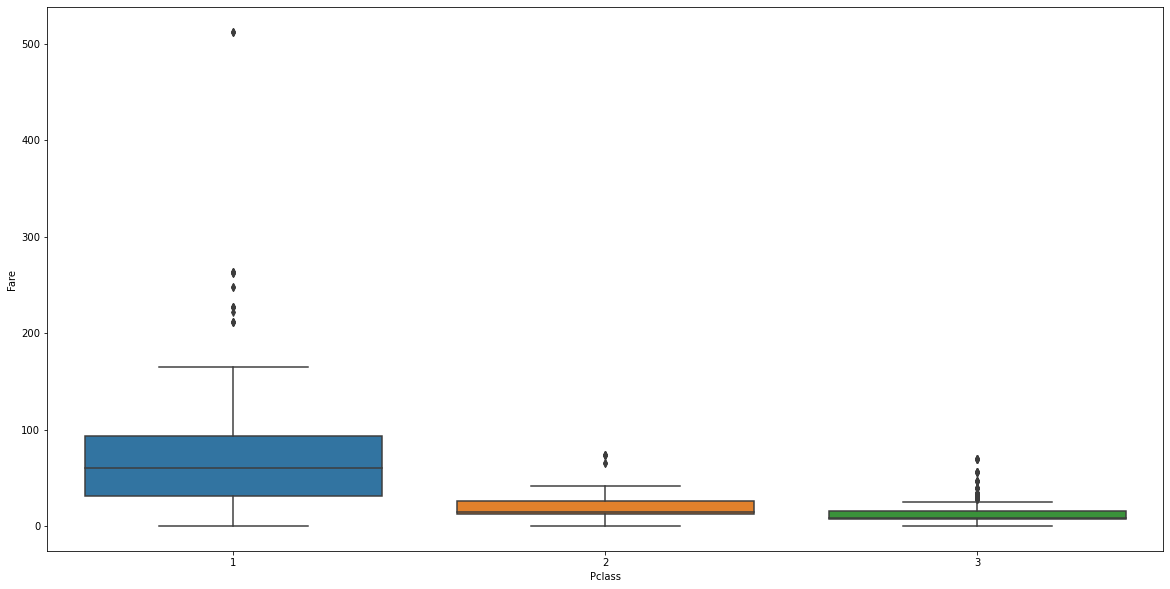

In [64]:
# remove all outliers
# remove some outliers

plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="Pclass",y="Fare")
plt.show()

In [65]:
for Pclass in df["Pclass"].unique():
    Fare = df[df["Pclass"] == Pclass]["Fare"]
    q1 = np.quantile(Fare,0.25)
    q3 = np.quantile(Fare,0.75)
    iqr = q3-q1
    uw = q3+(1.5*iqr)
    
    index = Fare[Fare > uw].index
    if len(index) != 0:
        df.drop(index, inplace = True)

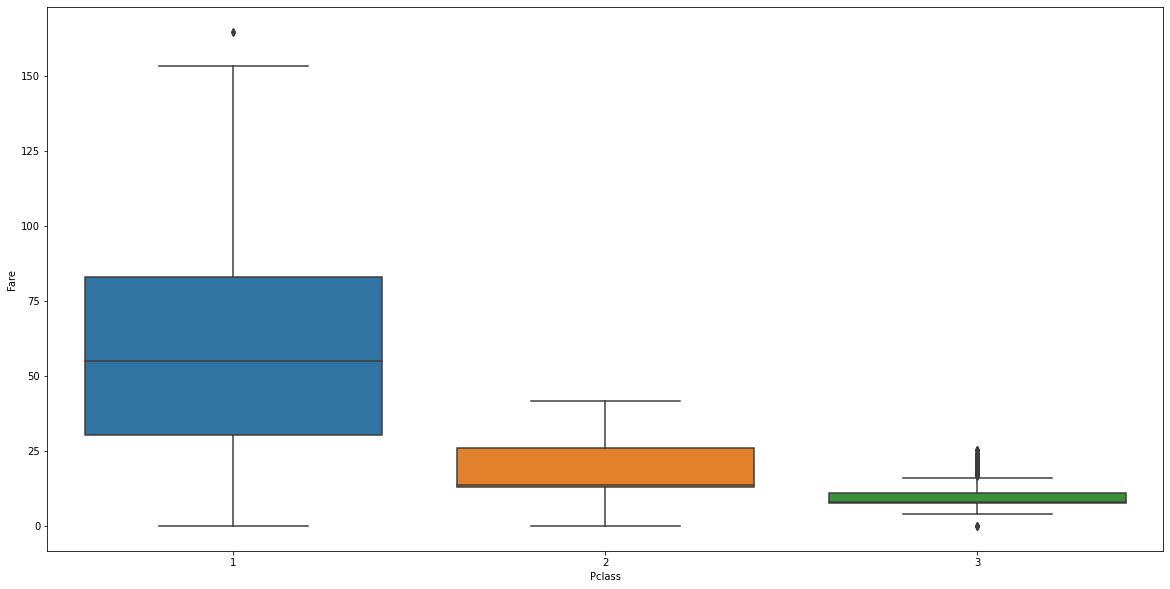

In [66]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="Pclass",y="Fare")
plt.show()

In [67]:
# we almost removed 78 fare outliers present in Fare

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  812 non-null    int64  
 1   Survived     812 non-null    int64  
 2   Pclass       812 non-null    int64  
 3   Name         812 non-null    object 
 4   Sex          812 non-null    object 
 5   Age          812 non-null    float64
 6   SibSp        812 non-null    int64  
 7   Parch        812 non-null    int64  
 8   Ticket       812 non-null    object 
 9   Fare         812 non-null    float64
 10  Embarked     812 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 108.4+ KB


In [68]:
# we converting SibSp,Parch and Pclass into categorical data

df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

In [69]:
# we are dropping name and ticket caolumn because we dont have use of it
df.drop(columns="Name",inplace = True)
df.drop(columns="Ticket",inplace = True)
df.drop(columns="PassengerId",inplace = True)

In [70]:
# spliting into categoral and numerical
df_num = df.select_dtypes(["int64","float64"])
df_cat = df.select_dtypes(["object","category"])

In [71]:
df_num.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [72]:
df_cat.head()

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


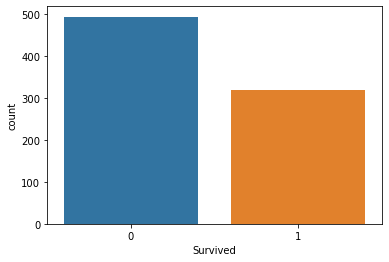

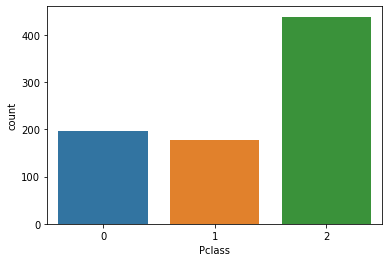

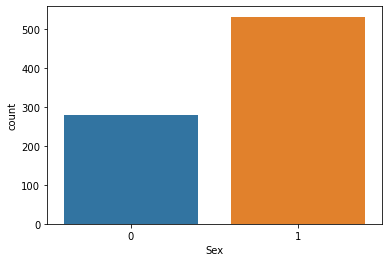

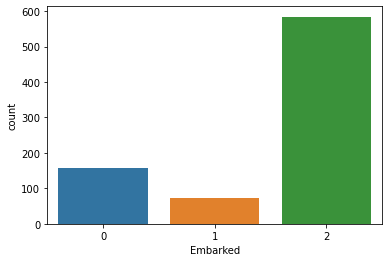

In [95]:
for col in df_cat:
    plt.figure()
    sns.countplot(data=df_cat,x=col)
    plt.show()

In [74]:
# one_hot coding
pd.get_dummies(df_cat["Pclass"]).head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [75]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [76]:
le = LabelEncoder()
le.fit_transform(df_cat["Pclass"])

array([2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 0,
       2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1, 2, 1,
       2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2,
       0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0,
       0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1,
       1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 0, 0,

In [77]:
# label encoding on all columns

for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [78]:
df_cat.head()

,Survived,Pclass,Sex,Embarked
0,0,2,1,2
1,1,0,0,0
2,1,2,0,2
3,1,0,0,2
4,0,2,1,2


In [79]:
# Numerical data

df_num.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [80]:
from scipy.stats import skew

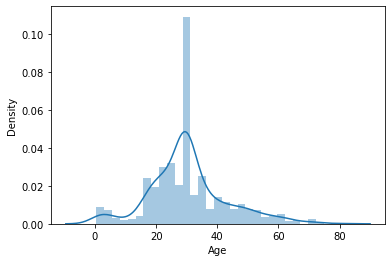

skewness:  0.528476616032306


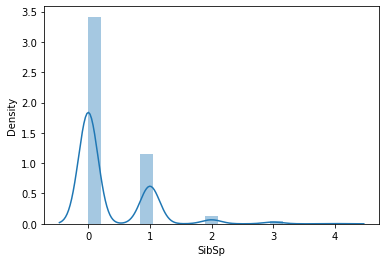

skewness:  2.0652406866018502


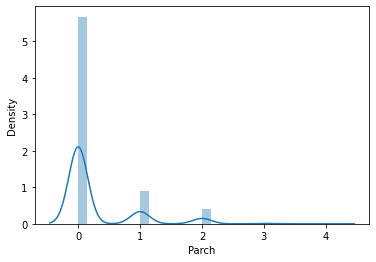

skewness:  2.402378103063817


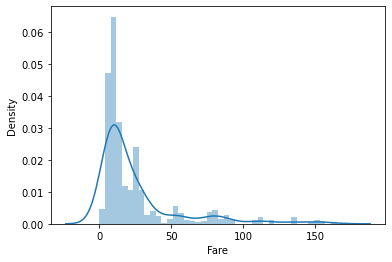

skewness:  2.4224806859089885


In [81]:
for col in df_num:
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()
    
    print("skewness: ",skew(df_num[col]))

In [82]:
df_num["SibSp"] = np.sqrt(df_num["SibSp"])
df_num["Parch"] = np.sqrt(df_num["Parch"])
df_num["Fare"] = np.sqrt(df_num["Fare"])

In [83]:
print(skew(df_num["SibSp"])) 
print(skew(df_num["Parch"]))
print(skew(df_num["Fare"]))

1.1554521980492003
1.7652143492305854
1.4359128548920306


In [84]:
# scaling

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [85]:
for col in df_num:
    ss = StandardScaler()
    df_num[col] = ss.fit_transform(df_num[[col]])

In [86]:
df_num.head()

,Age,SibSp,Parch,Fare
0,-0.657032,1.421221,-0.473346,-0.743250
1,0.603750,1.421221,-0.473346,1.711995
2,-0.341836,-0.611551,-0.473346,-0.690922
3,0.367354,1.421221,-0.473346,1.218428
4,0.367354,-0.611551,-0.473346,-0.681480


In [87]:
# combine both

df_new = pd.concat([df_cat,df_num], axis=1)

In [88]:
df_new.head()

,Survived,Pclass,Sex,Embarked,Age,SibSp,Parch,Fare
0,0,2,1,2,-0.657032,1.421221,-0.473346,-0.743250
1,1,0,0,0,0.603750,1.421221,-0.473346,1.711995
2,1,2,0,2,-0.341836,-0.611551,-0.473346,-0.690922
3,1,0,0,2,0.367354,1.421221,-0.473346,1.218428
4,0,2,1,2,0.367354,-0.611551,-0.473346,-0.681480


In [91]:
df_new["Family_size"] = df_new["SibSp"] + df_new["Parch"]

In [92]:
df_new.head()

,Survived,Pclass,Sex,Embarked,Age,SibSp,Parch,Fare,Family_size
0,0,2,1,2,-0.657032,1.421221,-0.473346,-0.743250,0.947875
1,1,0,0,0,0.603750,1.421221,-0.473346,1.711995,0.947875
2,1,2,0,2,-0.341836,-0.611551,-0.473346,-0.690922,-1.084897
3,1,0,0,2,0.367354,1.421221,-0.473346,1.218428,0.947875
4,0,2,1,2,0.367354,-0.611551,-0.473346,-0.681480,-1.084897
